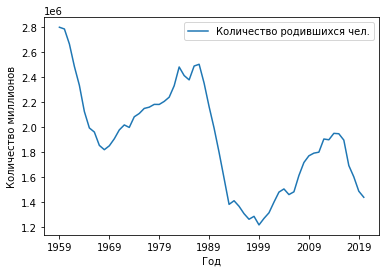

In [4]:
import requests
import lxml.html as lh
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


url='https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'
page = requests.get(url)
doc = lh.fromstring(page.content)

tr_elements = doc.xpath('//tr')

col=[]
i=0

for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    col.append((name,[]))

# Since out first row is the header, data is stored on the second row onwards
for j in range(1, len(tr_elements)):
    # T is our j'th row
    T = tr_elements[j]

    # If row is not of size 10, the //tr data is not from our table
    if len(T) != 2:
        break

    # i is the index of our column
    i = 0

    # Iterate through each element of the row
    for t in T.iterchildren():
        data = t.text_content()
        # Check if row is empty
        if i > 0:
            # Convert any numerical value to integers
            try:
                data = int(data)
            except:
                pass
        # Append the data to the empty list of the i'th column
        col[i][1].append(data)
        # Increment i for the next column
        i += 1
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

def ToNumber(x):
    x1 = x.split()
    out = ""
    x2 = out.join(x1)
    x3 = int(x2)
    return x3

df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: ToNumber(x))

df.plot.line(x = 'Год')
plt.ylabel('Количество миллионов')
plt.show()